In [1]:
#Logistic Regression in python

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def sigmoid(x):
    return 1/(1+np.e**-x)

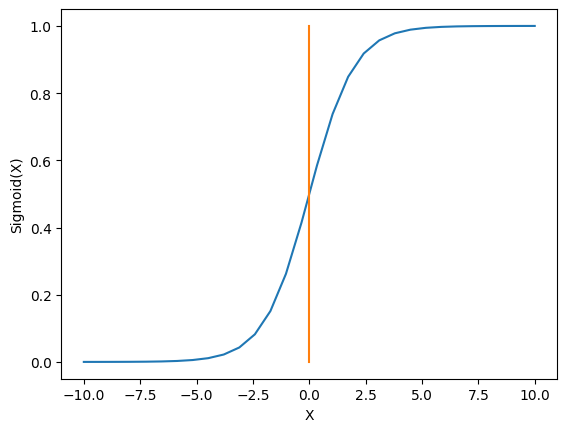

In [3]:
#Sigmoid function
#Import matplotlib,numpy, ans pnda
import matplotlib.pyplot as plt
import numpy as np
import math

x=np.linspace(-10,10,30)

z=sigmoid(x)

plt.plot(x,z)
plt.plot(np.zeros(6),[0,0.2,0.4,0.6,0.8,1]) ##Add vertical line at zero 
plt.xlabel("X")
plt.ylabel("Sigmoid(X)")
plt.show()

In [4]:
#Now lets see this with some example
#now i am creating some hypothetical data 



In [5]:
a=np.array([[2,3],[4,1],[5,4],[8,8],[9,1],[2,6]])
b=np.array([0,0,1,1,0,1])

In [6]:
df=pd.DataFrame(a,columns=["x1","x2"])
df["y"]=b

df

,x1,x2,y
0,2,3,0
1,4,1,0
2,5,4,1
3,8,8,1
4,9,1,0
5,2,6,1


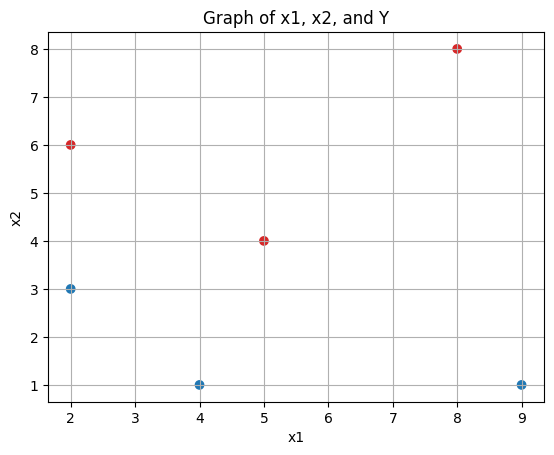

In [7]:
#All line together on the same plot for easy comparision
# Define the color mapping as a dictionary
colors = {0: 'tab:blue', 1: 'tab:red'}

# Scatter plot with mapped colors
plt.scatter(a[:, 0], a[:, 1], c=df["y"].map(colors))

# Labels and title
plt.title("Graph of x1, x2, and Y")
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid()

# Show the plot
plt.show()

In [8]:
#Now what cold be ideal pont for line of seperator
#So we will plotting some random line on it 

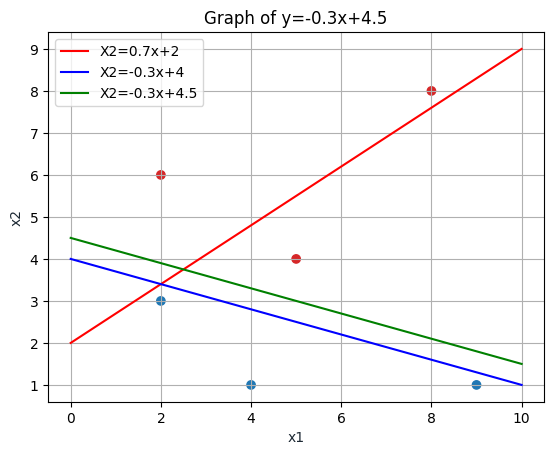

In [9]:
x=np.linspace(0,10,100)
plt.scatter(a[:,0],a[:,1],c=df["y"].map(colors))

y=0.7*x+2
plt.plot(x,y,'-r',label='X2=0.7x+2')

y=-0.3*x+4
plt.plot(x,y,'-b',label='X2=-0.3x+4')

y=-0.3*x+4.5
plt.plot(x,y,'-g',label='X2=-0.3x+4.5')
plt.title("Graph of y=-0.3x+4.5")
plt.xlabel("x1",color="#1C2833")
plt.ylabel("x2",color="#1C2833")
plt.legend(loc='upper left')
plt.grid()
plt.show()

In [10]:
#Both blue line and green line are seperating the classes
#But compare to the blue line ,green line is maintaining some safe distance form the both red points and blue points

In [11]:
#Now lets say how do we find that line
#So how can we say that this lines gives us the maximum seperation


In [12]:
#For that we need to define some type of matrices
#For any M.L problem we need to find out cost function or an error function
#[Cost Function | Error Function] is required to find the best seperation between 2 classes

#So we use cost function as -ve log likehhlikhood

In [13]:
def sigmoid(x):
    return 1/(1+np.e**-x)

def NeglogLikelihood(y,yhat):
    return -(np.log(yhat)*y + np.log(1-yhat)*(1-y))

In [17]:
#Compute the point on X2
df["x2_green"]=-0.3*df['x1']+4.5
df["x2_blue"]=-0.3*df["x1"]+4
df["x2_red"]=0.2*df["x1"]+2

#Find the Distance between each line to the corresponding point
df["dist_green"]=df["x2"]-df["x2_green"]
df["dist_blue"]=df["x2"]-df["x2_blue"]
df["dist_red"]=df["x2"]-df["x2_red"]

#Convert the distance to probability using Sigmoid
df["prob_green"]=sigmoid(df["dist_green"])
df["prob_blue"]=sigmoid(df["dist_blue"])
df["prob_red"]=sigmoid(df["dist_red"])

#compute the nagtive log likelihood for each line 
df["loglike_green"]=NeglogLikelihood(df['y'],df['prob_green'])
df["loglike_blue"]=NeglogLikelihood(df['y'],df['prob_blue'])
df['loglike_red']=NeglogLikelihood(df['y'],df['prob_red'])

#Sum of negatuve log likelihood for each line 
print("Lieklihood of Green: ",sum(df["loglike_green"]))
print("Likelihood of Blue: ",sum(df["loglike_blue"]))
print("Likelihood of Red: ", sum(df["loglike_red"]))

Lieklihood of Green:  1.2393169153543424
Likelihood of Blue:  1.4950662557590215
Likelihood of Red:  1.601919752434058


In [18]:
#Ye difference nikalega  
#Since green line is best line here 
#Literally we found a cost function that telll us the one which seperate this one in best possible way
#Since we cant do it for line so how can we do decide like which line to consider for chekcing the entropy
#In any of the machine learning alogrithm we represent that line in terms of hupothesis so i represnet the line in
#hypothesis that my hypothesis is like my line gives us the minimum possible value for the negative log likelihood


In [19]:
def sigmoid(z):
    return 1.0/(1.0 + np.exp(-1.0*z))

def hypothesis(X,theta):
    """
    X - np.array(m,n)
    theta - np.array(n,1)
    """
    return sigmoid(np.dot(X,theta))

In [20]:
#Now try to define our cost fucntion which is negative log likelihood
#since it will iterates over all the observation
#So we will tatke the mean of it 

def error(X,y,theta):
    """
    params:
          X -np.array(m,n)
          Y -np.array(n,1)
          theta-np.array(n,1)

    return : 
            scaler value=loss value
    """
    hypo=hypothesis(X,theta)
    err=np.mean((y*np.log(hypo)+(1-y)*np.log(1-hypo)))

    return -err

In [21]:
#Ab apna gradient Function hoga yaha pe
def gradient(X,y,theta):
    """
    X-(m,n)
    Y-(n,1)
    theta-(n,1)
    return-(n,1)
    """
    hypo=hypothesis(X,theta)
    grad=(np.dot(X.T,hypo-y))
    return grad/X.shape[0]

In [52]:
#Now we put all this together in gradient descent fucntion
def gradient_descent(X, y, lr=0.5, max_iter=30):
    theta = np.zeros((X.shape[1], 1))
    error_list = []

    for _ in range(max_iter):
        e = error(X, y, theta)  # Assuming error function is defined
        error_list.append(e)  # Fixed incorrect variable name
        
        grad = gradient(X, y, theta)  # Assuming gradient function is defined
        # Update Rule
        theta = theta - lr * grad  

    return theta/X.shape[1], error_list
#For fast iteration we gave the learning rate as 0.5

In [34]:
#dataset creation
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=500,
                           n_features=2,
                           n_redundant=0,
                           n_clusters_per_class=1,
                           random_state=5)


# X=dataset[:,:2]
# Y=dataset[:,-1]
#through this make_classification we can create dataset for the classification problems


In [35]:
X.shape

(500, 2)

In [36]:
y.shape

(500,)

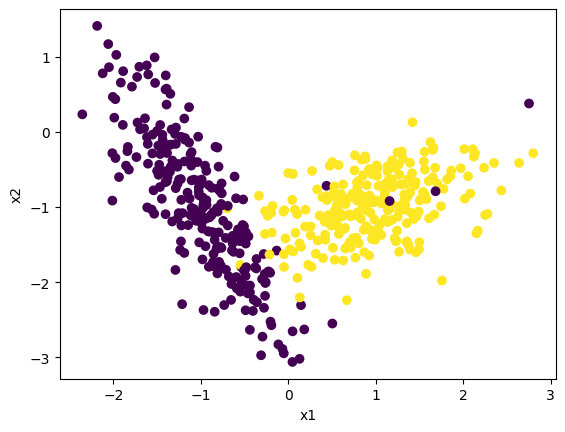

In [37]:
#Lets visualize this data using scatterplot

plt.scatter(X[:,0],X[:,1],c=y)

plt.xlabel("x1")
plt.ylabel("x2")
plt.show()


In [38]:
#Now we are going to find line jo ki isko ache se seperate krega
#now lets put this data into algorithm which we have built form the scratch
#because we have only x1 and x2 but ideally we should add a dummy vairable for our theta0


In [39]:
ones=np.ones((500,1))
X_=np.hstack((ones,X))
X_[:5]

array([[ 1.        ,  1.22167239, -0.4757541 ],
       [ 1.        , -0.2292072 , -1.85663378],
       [ 1.        , -1.34913896,  0.50458721],
       [ 1.        ,  0.31402206, -1.62029248],
       [ 1.        ,  1.13807877, -0.99148158]])

In [40]:
#Today we are learning so for today for ths sake of computing i would just go with this datset withou validating

In [41]:
#tommorrow when we actually go to the problem there we would work & try to use validation datset or maybe try to us e
#some cross vallidation there too

In [42]:
#Splitting the data


In [43]:
from sklearn.model_selection import train_test_split

#Reserving 20% of the data for testing purposes
X_train,X_test,y_train,y_test=train_test_split(X_,y,test_size=0.2,random_state=42)

In [53]:
opt_theta,error_list=gradient_descent(X_train,y_train)

In [54]:
opt_theta

array([[ 0.65740311, -0.65740311, -0.65740311, ...,  0.65740311,
         0.65740311,  0.65740311],
       [-0.05980583,  0.05980583,  0.05980583, ..., -0.05980583,
        -0.05980583, -0.05980583],
       [-0.45049877,  0.45049877,  0.45049877, ..., -0.45049877,
        -0.45049877, -0.45049877]])

In [48]:
#hume sab ka avg krna hoga so we will get theta1 theta2 and soon...



In [49]:
#lets try it using modules
from sklearn.linear_model import LogisticRegression
logistic=LogisticRegression()
logistic.fit(X_train,y_train)
logistic.intercept_

array([1.47191488])

In [51]:
logistic.coef_

array([[-1.47624739e-03,  3.89638974e+00,  8.51637292e-01]])

In [55]:
##Model Perfromance test datasets


In [57]:
y_pred=logistic.predict(X_test)

In [58]:
#Guess what error metrices is used for the Classification problems

#Accuracy-Accuracy is very common metrix that we use wehn t comes to find out the efficieny of the classification probelsm 

In [60]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [61]:
confusion_matrix(y_test,y_pred)

array([[47,  3],
       [ 2, 48]], dtype=int64)

In [62]:
accuracy_score(y_test,y_pred)

0.95

In [64]:
#it is not practically possible but it is good

In [65]:
#Copy me confusion matrix ke baad ka codes ye rheg

In [66]:
from sklearn.metrics import precision_score,recall_score

In [67]:
precision_score(y_test,y_pred)

0.9411764705882353

In [68]:
recall_score(y_test,y_pred)

0.96

In [69]:
y_pred

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0])

In [70]:
#And by looking at it are you getting any questions 


In [71]:
prob=logistic.predict_proba(X_test)

In [72]:
prob

array([[7.96848012e-04, 9.99203152e-01],
       [1.82016348e-02, 9.81798365e-01],
       [9.38302349e-03, 9.90616977e-01],
       [7.87020237e-01, 2.12979763e-01],
       [9.52084298e-01, 4.79157021e-02],
       [9.62538371e-01, 3.74616285e-02],
       [9.19828978e-01, 8.01710223e-02],
       [2.22719186e-03, 9.97772808e-01],
       [9.95651015e-01, 4.34898479e-03],
       [8.90635743e-02, 9.10936426e-01],
       [1.70250814e-02, 9.82974919e-01],
       [7.18930474e-02, 9.28106953e-01],
       [7.57496407e-03, 9.92425036e-01],
       [1.51468673e-03, 9.98485313e-01],
       [9.98625511e-01, 1.37448941e-03],
       [9.62220309e-01, 3.77796912e-02],
       [8.88782045e-01, 1.11217955e-01],
       [1.98948389e-03, 9.98010516e-01],
       [8.78430786e-01, 1.21569214e-01],
       [9.80444796e-01, 1.95552037e-02],
       [6.10004427e-03, 9.93899956e-01],
       [6.33990319e-04, 9.99366010e-01],
       [1.31346298e-03, 9.98686537e-01],
       [9.67344351e-01, 3.26556485e-02],
       [6.366892